In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Import data
df = pd.read_csv('../yellow_tripdata_2019-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [3]:
#Analyze dataframe type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [4]:
#Basic statistics
df.describe()

#Max distance related to max total_amount? 
#Calculate density based on time/distance and detect heavier zones. Related to congestion_surcharge?

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [5]:
#If this csv is related to January, why there are info from November and December?
#Sug. datetime objects to type datetime and extract month/day/hour

In [6]:
#Datetime objects to datetime types
df['date_pickup'] = df['tpep_pickup_datetime'].astype('datetime64')
df['date_dropoff'] = df['tpep_dropoff_datetime'].astype('datetime64')

In [7]:
#Validate types
df.dtypes

VendorID                          int64
tpep_pickup_datetime             object
tpep_dropoff_datetime            object
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
date_pickup              datetime64[ns]
date_dropoff             datetime64[ns]
dtype: object

In [8]:
#Create month series to check if there are different values to January
df['month'] = df['date_pickup'].dt.month
df['month'].value_counts()

#Those different months could be a typo

1     7667309
12        377
2          73
11         11
7           6
4           6
3           5
6           2
9           1
8           1
5           1
Name: month, dtype: int64

<ipython-input-9-79ab19d5a562>:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  mode = df['trip_distance'].mode().get_values()[0]


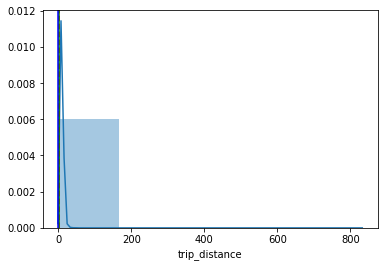

In [9]:
#Explore distance serie. Binning data by km

mean = df['trip_distance'].mean()
median = df['trip_distance'].median()
mode = df['trip_distance'].mode().get_values()[0]

sns.distplot(df['trip_distance'], bins=5)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')

plt.show()

In [10]:
#Is there any distance value = 0?
distance0 = df[(df['trip_distance'] == 0.0)]['trip_distance']
print('There are', str(len(distance0)),'records with distance 0')

There are 54770 records with distance 0


In [11]:
#Analyze when distance = 0, which total_amount there are
df[(df['trip_distance'] == 0.0)]['total_amount'].value_counts()

 3.30      10279
 3.80       5902
 4.30       3780
 52.80      1491
 0.00       1270
           ...  
 83.64         1
 35.66         1
 6.61          1
 265.30        1
-15.82         1
Name: total_amount, Length: 3546, dtype: int64

In [12]:
#Analyze when distance and total are both 0
dt0 = len(df[(df['trip_distance'] == 0.0) & (df['total_amount'] == 0.00)])
print('There are', dt0, 'trips with 0 miles and a value of $0.')

There are 1270 trips with 0 miles and a value of $0.


In [13]:
#Distance five-number summary
print('The max distance is', str(df['trip_distance'].max()), 'miles.')
print('The min distance is', str(df[(df['trip_distance'] != 0)]['trip_distance'].min()), 'miles.')
print('The lower quartile is', str(df['trip_distance'].quantile(.25)))
print('The higher quartile is', str(df['trip_distance'].quantile(.75)))
print('The mean is', str(round(df['trip_distance'].mean(),2)))

The max distance is 831.8 miles.
The min distance is 0.01 miles.
The lower quartile is 0.9
The higher quartile is 2.8
The mean is 2.8


In [14]:
#Binning distance
df['distance'] = pd.cut(df['trip_distance'], 10)
df['distance'].value_counts()

(-0.832, 83.18]     7667744
(83.18, 166.36]          43
(166.36, 249.54]          3
(748.62, 831.8]           1
(665.44, 748.62]          1
(582.26, 665.44]          0
(499.08, 582.26]          0
(415.9, 499.08]           0
(332.72, 415.9]           0
(249.54, 332.72]          0
Name: distance, dtype: int64

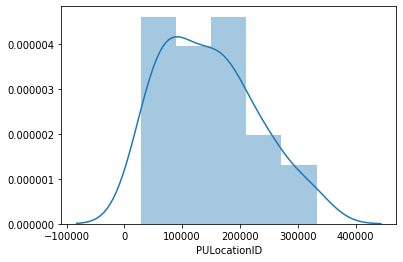

In [30]:
#Explore zones where taxis pickup. Top 50.

plt.figure()
sns.distplot(df['PULocationID'].value_counts().nlargest(50))
plt.show()

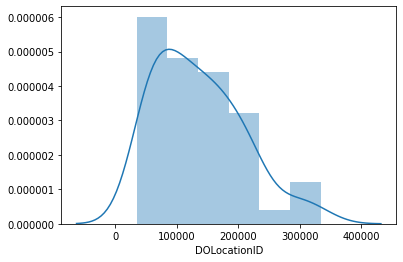

In [32]:
#Explore zones where taxis dropoff
plt.figure()
sns.distplot(df['DOLocationID'].value_counts().nlargest(50))
plt.show()